###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from [this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The Finite-Difference Method/fd_ac1d.ipynb) by Heiner Igel ([@heinerigel](https://github.com/heinerigel)), Lion Krischer ([@krischer](https://github.com/krischer)) and Taufiqurrahman ([@git-taufiqurrahman](https://github.com/git-taufiqurrahman)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO

# 从一维到二维声学有限差分建模

一维的声学波动方程对于了解有限差分建模的基本概念和相关问题非常有用。然而，对于现实建模和地震成像/反演应用，我们必须至少求解二维声学波动方程。

在本节课中，我们将发展二维声学有限差分代码基于一维代码。我强烈建议你自己完成这个步骤，从一维代码开始 [1D code](https://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/05_2D_acoustic_FD_modelling/lecture_notebooks/1_From_1D_to_2D_acoustic_FD_modelling.ipynb). 

## 二维声学波动方程的有限差分解

作为派生 [this](https://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/01_Analytical_solutions/3_Acoustic_medium.ipynb) 和 [this lecture](https://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/01_Analytical_solutions/4_2D_1D_elastic_acoustic_approx.ipynb), 在二维常密度介质中的声学波动方程为：

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial t^2} \ = \ vp(x,z)^2 \biggl(\frac{\partial^2 p(x,z,t)}{\partial x^2}+\frac{\partial^2 p(x,z,t)}{\partial z^2}\biggr) + f(x,z,t) \nonumber
\end{equation}

压力 $p$, 声学速度 $vp$ 和震源项 $f$. 我们可以把震源项分成空间和时间两部分。 在空间上，我们假设源被定位在一个点上 ($x_s, z_s$). 因此, 空间源的贡献由两个Dirac $\delta$-functions $\delta(x-x_s)$ 和 $\delta(z-z_s)$ 组成. 时间源部分是任意地震子波 $s(t)$:

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial t^2} \ = \ vp(x,z)^2 \biggl(\frac{\partial^2 p(x,z,t)}{\partial x^2}+\frac{\partial^2 p(x,z,t)}{\partial z^2}\biggr) + \delta(x-x_s)\delta(z-z_s)s(t) \nonumber
\end{equation}

两个二阶导数都可以用三点差公式近似. 例如对于时间导数，我们得到:

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial t^2} \ \approx \ \frac{p(x,z,t+dt) - 2 p(x,z,t) + p(x,z,t-dt)}{dt^2}, \nonumber
\end{equation}

相似地，空间导数为: 

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial x^2} \ \approx \ \frac{p(x+dx,z,t) - 2 p(x,z,t) + p(x-dx,z,t)}{dx^2}, \nonumber
\end{equation}

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial x^2} \ \approx \ \frac{p(x,z+dz,t) - 2 p(x,z,t) + p(x,z-dz,t)}{dz^2}, \nonumber
\end{equation}

将这些近似值导入波动方程，我们就可以将时间步长 $t+dt$ (未来)的压强p(x)作为时刻 $t$ (现在)和 $t-dt$ (过去)的压强的函数。 这个被称为 **显式时间积分方案** 允许将空间相关场 $外推$ 仅观察最近的邻域。


下一步，我们将离散空间网格点上的纵波速度和压力波场离散化

\begin{align}
x &= i*dx\nonumber\\
z &= j*dz\nonumber\\
\end{align}

这里 $i = 0, 1, 2, ..., nx$, $j = 0, 1, 2, ..., nz$ 在一个二维的笛卡尔坐标系.

<img src="images/2D-grid_cart_ac.png" width="75%">

使用离散时间步长

\begin{align}
t &= n*dt\nonumber
\end{align}

这里 $n = 0, 1, 2, ..., nt$ 和时间步长 $dt$, 我们可以将与时间相关的部分(上索引时间，下索引空间)替换为

\begin{equation}
 \frac{p_{i,j}^{n+1} - 2 p_{i,j}^n + p_{i,j}^{n-1}}{\mathrm{d}t^2} \ = \ vp_{i,j}^2 \biggl( \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial z^2}\biggr) \ + \frac{s_{i,j}^n}{dx\;dz}. \nonumber
\end{equation}

空间 $\delta$-functions $\delta(x-x_s)$ 和 $\delta(z-z_s)$ 在震源项中可以近似为boxcar function:

$$
\delta_{bc}(x) = \left\{
\begin{array}{ll}
	1/dx &|x|\leq dx/2 \\
	0 &\text{elsewhere} 	
\end{array}
\right.
$$

求解 $p_{i,j}^{n+1}$ 可以得到外推方案:

\begin{equation}
p_{i,j}^{n+1} \ = \ vp_{i,j}^2 \mathrm{d}t^2 \left( \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial z^2} \right) + 2p_{i,j}^n - p_{i,j}^{n-1} + \frac{\mathrm{d}t^2}{dx\; dz} s_{i,j}^n.
\end{equation}

空间导数由

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial x^2} \ \approx \ \frac{p_{i+1,j}^{n} - 2 p_{i,j}^n + p_{i-1,j}^{n}}{\mathrm{d}x^2} \nonumber
\end{equation}

和

\begin{equation}
\frac{\partial^2 p(x,z,t)}{\partial z^2} \ \approx \ \frac{p_{i,j+1}^{n} - 2 p_{i,j}^n + p_{i,j-1}^{n}}{\mathrm{d}z^2}. \nonumber
\end{equation}

式(1)是二维有限差分建模代码的基本核心。 因为我们推导了均匀介质中波传播的解析解，我们应该测试类似介质的第一个代码实现，通过设置

\begin{equation}
vp_{i,j} = vp0\notag
\end{equation}

在每一个空间网格点 $i = 0, 1, 2, ..., nx$; $j = 0, 1, 2, ..., nz$, 为了将数值解与解析解进行比较。为了完整地描述这个问题，我们还必须定义初始条件和边界条件。 **初始条件** 为 

\begin{equation}
p_{i,j}^0 = 0, \nonumber
\end{equation}

因此，建模从每个空间网格点的零压力振幅开始 $i, j$. 关于 **边界条件**, 我们假设

\begin{align}
p_{0,j}^n = 0, \nonumber\\
p_{nx,j}^n = 0, \nonumber\\
p_{i,0}^n = 0, \nonumber\\
p_{i,nz}^n = 0, \nonumber
\end{align}

对于所有时间步长 n. 这个 **Dirichlet边界条件**, 导致人工边界反射，显然不能描述均匀介质。现在，我们只是扩展模型，这样边界反射就不会被记录在接收位置。

让我们实现它 ...

In [1]:
# Import Libraries 
# ----------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Definition of modelling parameters
# ----------------------------------
xmax = 500.0 # maximum spatial extension of the 1D model in x-direction (m)
zmax = xmax  # maximum spatial extension of the 1D model in z-direction(m)
dx   = 1.0   # grid point distance in x-direction
dz   = dx    # grid point distance in z-direction

tmax = 0.502   # maximum recording time of the seismogram (s)
dt   = 0.0010  # time step

vp0  = 580.   # P-wave speed in medium (m/s)

# acquisition geometry
xr = 330.0 # x-receiver position (m)
zr = xr    # z-receiver position (m)

xsrc = 250.0 # x-source position (m)
zsrc = 250.0 # z-source position (m)

f0   = 40. # dominant frequency of the source (Hz)
t0   = 4. / f0 # source time shift (s)

## 比较二维有限差分和数值解

在下面的函数中，我们用三点时空差分算子求解齐次二维声波方程，并将数值结果与解析解进行比较: 

\begin{equation}
G_{analy}(x,z,t) = G_{2D} * S \nonumber 
\end{equation}

二维Green's function:

\begin{equation}
G_{2D}(x,z,t) = \dfrac{1}{2\pi V_{p0}^2}\dfrac{H\biggl((t-t_s)-\dfrac{|r|}{V_{p0}}\biggr)}{\sqrt{(t-t_s)^2-\dfrac{r^2}{V_{p0}^2}}}, \nonumber 
\end{equation}

这里 $H$ 表示 Heaviside function, $r = \sqrt{(x-x_s)^2+(z-z_s)^2}$ 代表震源-接收器之间的距离 (偏移距)，$S$ 代表震源子波.

为了更好地处理建模参数，我将输入参数限制为dt和dx。在此函数中估计空间网格点数和时间步数，以及离散的源和接收位置。

In [3]:
# 2D Wave Propagation (Finite Difference Solution) 
# ------------------------------------------------
def FD_2D_acoustic(dt,dx,dz):
        
    nx = (int)(xmax/dx) # number of grid points in x-direction
    print('nx = ',nx)
    
    nz = (int)(zmax/dz) # number of grid points in x-direction
    print('nz = ',nz)
            
    nt = (int)(tmax/dt) # maximum number of time steps            
    print('nt = ',nt)
    
    ir = (int)(xr/dx)      # receiver location in grid in x-direction    
    jr = (int)(zr/dz)      # receiver location in grid in z-direction
    
    isrc = (int)(xsrc/dx)  # source location in grid in x-direction
    jsrc = (int)(zsrc/dz)  # source location in grid in x-direction

    # Source time function (Gaussian)
    # -------------------------------
    src  = np.zeros(nt + 1)
    time = np.linspace(0 * dt, nt * dt, nt)

    # 1st derivative of a Gaussian
    src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(- (f0 ** 2) * (time - t0) ** 2))

    # Analytical solution
    # -------------------
    G    = time * 0.

    # Initialize coordinates
    # ----------------------
    x    = np.arange(nx)
    x    = x * dx       # coordinates in x-direction (m)

    z    = np.arange(nz)
    z    = z * dz       # coordinates in z-direction (m)
    
    # calculate source-receiver distance
    r = np.sqrt((x[ir] - x[isrc])**2 + (z[jr] - z[jsrc])**2)
    
    for it in range(nt): # Calculate Green's function (Heaviside function)
        if (time[it] - r / vp0) >= 0:
            G[it] = 1. / (2 * np.pi * vp0**2) * (1. / np.sqrt(time[it]**2 - (r/vp0)**2))
    Gc   = np.convolve(G, src * dt)
    Gc   = Gc[0:nt]
    lim  = Gc.max() # get limit value from the maximum amplitude
    
    # Initialize empty pressure arrays
    # --------------------------------
    p    = np.zeros((nx,nz)) # p at time n (now)
    pold = np.zeros((nx,nz)) # p at time n-1 (past)
    pnew = np.zeros((nx,nz)) # p at time n+1 (present)
    d2px = np.zeros((nx,nz)) # 2nd spatial x-derivative of p
    d2pz = np.zeros((nx,nz)) # 2nd spatial z-derivative of p

    # Initialize model (assume homogeneous model)
    # -------------------------------------------
    vp    = np.zeros((nx,nz))
    vp    = vp + vp0       # initialize wave velocity in model

    # Initialize empty seismogram
    # ---------------------------
    seis = np.zeros(nt) 
    
    # Calculate Partial Derivatives
    # -----------------------------
    for it in range(nt):
    
        # FD approximation of spatial derivative by 3 point operator
        for i in range(1, nx - 1):
            for j in range(1, nz - 1):
                
                d2px[i,j] = (p[i + 1,j] - 2 * p[i,j] + p[i - 1,j]) / dx ** 2                
                d2pz[i,j] = (p[i,j + 1] - 2 * p[i,j] + p[i,j - 1]) / dz ** 2

        # Time Extrapolation
        # ------------------
        pnew = 2 * p - pold + vp ** 2 * dt ** 2 * (d2px + d2pz)

        # Add Source Term at isrc
        # -----------------------
        # Absolute pressure w.r.t analytical solution
        pnew[isrc,jsrc] = pnew[isrc,jsrc] + src[it] / (dx * dz) * dt ** 2
                
        # Remap Time Levels
        # -----------------
        pold, p = p, pnew
    
        # Output of Seismogram
        # -----------------
        seis[it] = p[ir,jr]   
        
    # Compare FD Seismogram with analytical solution
    # ---------------------------------------------- 
    # Define figure size
    rcParams['figure.figsize'] = 12, 5
    plt.plot(time, seis, 'b-',lw=3,label="FD solution") # plot FD seismogram
    Analy_seis = plt.plot(time,Gc,'r--',lw=3,label="Analytical solution") # plot analytical solution
    plt.xlim(time[0], time[-1])
    plt.ylim(-lim, lim)
    plt.title('Seismogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()            

nx =  500
nz =  500
nt =  502


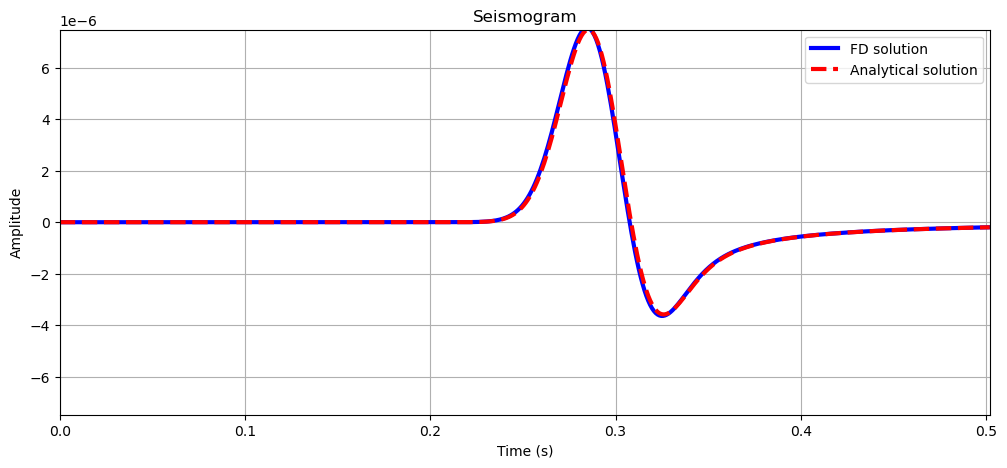

CPU times: user 1min 48s, sys: 603 ms, total: 1min 48s
Wall time: 1min 48s


In [4]:
%%time
dx   = 1.0     # grid point distance in x-direction (m)
dx   = dz      # grid point distance in z-direction (m)
dt   = 0.0010  # time step (s)
FD_2D_acoustic(dt,dx,dz)

好的，2D声学建模代码似乎运行正常。尽管数值离散较小，但解析解与数值解的匹配相当准确。然而，大约3分钟的运行时有一些性能优化的空间，我们将在下一讲中讨论 ...

## 我们学习到:

* 在已有的一维编码的基础上，开发二维声学有限差分建模代码是很容易的。
* 草率实现的运行时有点令人印象深刻，所以我们必须考虑一些性能优化。